In [0]:
pip install quandl


  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6077 sha256=01f1041e0eb4de6d715dea81334e5da6b92104fc481427f5d9b7daecca1eb475
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


In [0]:
##što će nam sve trebati u programu
import quandl
import numpy as np
from sklearn.linear_model import LinearRegression ##linerana regresija
from sklearn.svm import SVR ##support vector machine
from sklearn.model_selection import train_test_split ##za razdvajanje i uvježbavanje podata te njihovo testiranje
import pandas as pd
import matplotlib.pyplot as plt




In [0]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_excel('AAPL.xlsx')
df


Saving AAPL.xlsx to AAPL (2).xlsx


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58485714,58928570,58428570,58747143,50994907,75555200
1,2012-01-04,58571430,59240002,58468571,59062859,51268970,65005500
2,2012-01-05,59278572,59792858,58952858,59718571,51838169,67817400
3,2012-01-06,59967144,60392857,59888573,60342857,52380054,79573200
4,2012-01-09,60785713,61107143,60192856,60247143,52296970,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280529999,284250000,280369995,284000000,283327576,24643000
2007,2019-12-24,284690002,284890015,282920013,284269989,283596924,12119700
2008,2019-12-26,284820007,289980011,284700012,289910004,289223602,23280300
2009,2019-12-27,291119995,293970001,288119995,289799988,289113831,36566500


In [0]:
df= df[['Adj Close']] ##nezavisna varijabla
print(df.head())

   Adj Close
0   50994907
1   51268970
2   51838169
3   52380054
4   52296970


In [0]:
forecast_out= 30 #za koliko dana želimo predvidjeti kretanje cijena dionica
df['Prediction']=df[['Adj Close']].shift(- forecast_out)
print(df.tail())


      Adj Close  Prediction
2006  283327576         NaN
2007  283596924         NaN
2008  289223602         NaN
2009  289113831         NaN
2010  290829773         NaN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
##stvoriti nezavisni set podataka,za to će nam biti potreban numpy
##pretvoriti podatke u numpy array
x=np.array(df.drop(['Prediction'],1))
##obrisati n dane
x=x[:-forecast_out]
print(x)

[[ 50994907]
 [ 51268970]
 [ 51838169]
 ...
 [261339752]
 [263843811]
 [262018158]]


In [0]:
##stvaramo zavisnu varijablu y 
##pretvaramo podatke u numpy array
y=np.array(df['Prediction']) 
##sve vrijednosti zavisnog seta podataka osim broja dana za koji želimo napraviti predviđanje
y=y[:-forecast_out]
print(y)


[6.17139820e+07 6.22769390e+07 6.22658000e+07 ... 2.89223602e+08
 2.89113831e+08 2.90829773e+08]


In [0]:

##podatci podijeljeni u 80% podataka za treniranje i 20 % za testiranje,za to koristimo funkciju koju smo definirali na početku
###funkcija train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



In [0]:
##Stvaranje seta i treniranje koristeći model Linearne Regresije
lr=LinearRegression()
##treniranje seta 
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
##x_forecast jednak broju dana za koliki želimo napraviti predviđanje iz orginalnog seta podataka iz stupca Adj-Close
x_forecast=np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)


[[265130768]
 [266467590]
 [265659515]
 [262566864]
 [261389648]
 [261160187]
 [265739319]
 [263664246]
 [267205841]
 [266617249]
 [263534546]
 [258835724]
 [261120270]
 [264951172]
 [270069031]
 [266288025]
 [267844330]
 [270128906]
 [270817261]
 [274498535]
 [279197357]
 [279746094]
 [279077667]
 [279356995]
 [278778381]
 [283327576]
 [283596924]
 [289223602]
 [289113831]
 [290829773]]


In [0]:
##Predviđanje za slijedećih n dana koristeći model linearne regresije 
lr_prediction=lr.predict(x_forecast)
print(lr_prediction)




[2.72532777e+08 2.73906587e+08 2.73076154e+08 2.69897934e+08
 2.68688146e+08 2.68452336e+08 2.73158166e+08 2.71025679e+08
 2.74665265e+08 2.74060387e+08 2.70892390e+08 2.66063558e+08
 2.68411314e+08 2.72348212e+08 2.77607675e+08 2.73722054e+08
 2.75321420e+08 2.77669207e+08 2.78376607e+08 2.82159737e+08
 2.86988569e+08 2.87552489e+08 2.86865567e+08 2.87152624e+08
 2.86558000e+08 2.91233065e+08 2.91509866e+08 2.97292226e+08
 2.97179418e+08 2.98942837e+08]


Text(0.5, 1.0, 'Prikaz cijena pomoću linearne regresije')

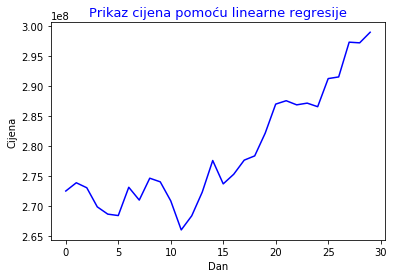

In [0]:
plt.plot(lr_prediction,color='blue')
plt.xlabel('Dan')
plt.ylabel('Cijena')
plt.title('Prikaz cijena pomoću linearne regresije',size=13,color='blue')